# <center>Titanic Data Investigation</center>
<center>*Javier Monterrubio Martín 12/10/2015*</center>

# 1. Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## 1.1 About the dataset

The dataset of study contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variables included are:

survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

# 2. Data Analysis

## 2.1 Making questions

In this analysis where are going to answer some questions and visualize them.

   * It's true in this case the phrase 'women and children first'?
   * Man with childs or spouse had more chances of survive?
   * Comparation of survivors by age, class and gender.
   * Had first class passengers more chances of survive?
   * What is the best family size for people survival?
   
## 2.2 Investigating data

First of all lets explore the dataset in order to find surprising data points and fix any problems there could be.

In [2]:
import pandas as pd

titanic_df = pd.read_csv("titanic_data.csv")
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


To answer the questions we won't need all the given fields so to clean and prepare the data (if needed) we are going to take just *Survived, Pclass, Sex, Age, SibSp and Parch*.

In [3]:
titanic_df = titanic_df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"]]
titanic_df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000


Five of the six selected field are numeric so the *describe* function shows a better summary of them. We can't see anything strange except some missing values in the age field (714/891).

In [4]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

So the main problem resides in the missing values of the *age* field. In this case we decided to made a listwise deletion because it doesn't make sense to impute the ages neither with the average or using linear regression.  

In [5]:
titanic_df = titanic_df[titanic_df["Age"].notnull()]
len(titanic_df)

714

## Answering questions

### It's true in this case the phrase 'women and children first'?

The easiest way to answer this question is to show a plot of how the survivors are distributed depending on age and sex. To know if the passenger is a child or not, we're going to add a column *IsChild* with values 0 if age is greather than 18 and 1 if it's less than or equal 18.

In [29]:
def isChild(x):
    if x > 18:
        return 0
    else:
        return 1
titanic_df["IsChild"] = pd.Series(titanic_df["Age"].apply(isChild), index=titanic_df.index)


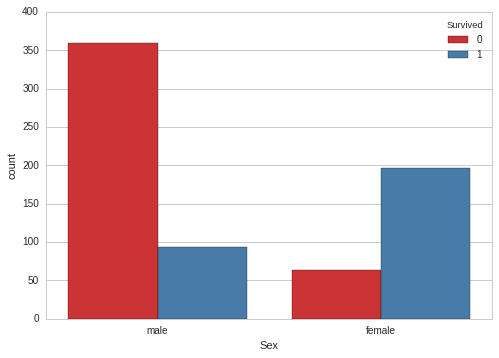

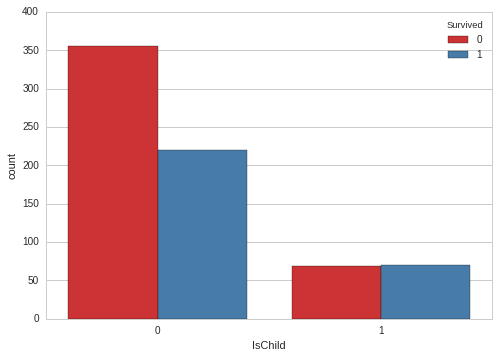

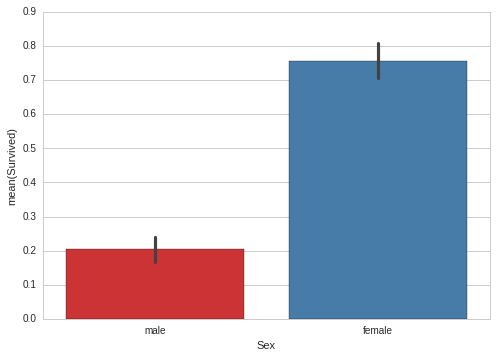

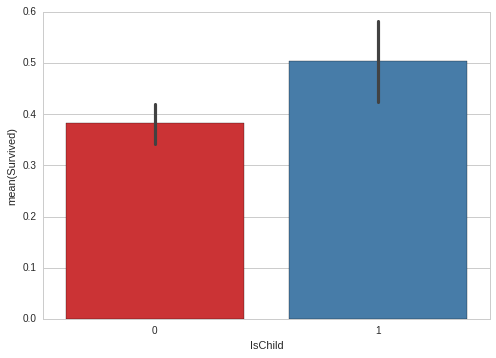

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# g = sns.FacetGrid(titanic_df, row="Sex", col="IsChild", hue="Survived")
# g.map(plt.scatter,"Sex","IsChild")
# g.add_legend()

sns.set(style="whitegrid")
sns.countplot(data=titanic_df,x="Sex",hue="Survived", palette="Set1")
sns.plt.show()
sns.countplot(data=titanic_df,x="IsChild",hue="Survived", palette="Set1")
sns.plt.show()
sns.barplot(data=titanic_df,x="Sex",y="Survived", palette="Set1")
sns.plt.show()
sns.barplot(data=titanic_df,x="IsChild",y="Survived", palette="Set1")
sns.plt.show()

As we can see in the first two plots